In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
result_df = pd.read_csv("domainadaptationexperiments.csv")
#result_df = pd.read_csv("domainadaptationexperiments-withexperiencereplay.csv")
#result_df = pd.read_csv("domainadaptationexperiments-withoutexperiencereplay.csv")
result_df = result_df.dropna()
display(result_df)

,source_train_dataset,target_train_dataset,training_method,test_dataset,adaptation_state,test_region_type,test_abs_rel,test_sq_rel,test_log10,test_rmse,test_rmse_log,test_a1,test_a2,test_a3
0,KITTI,DDAD,SCDepth,KITTI,before_adaptation,full,0.115,0.742,0.050,4.555,0.183,0.872,0.963,0.985
1,KITTI,DDAD,SCDepth,KITTI,before_adaptation,dynamic,0.191,2.072,0.084,7.111,0.282,0.726,0.891,0.949
2,KITTI,DDAD,SCDepth,KITTI,before_adaptation,static,0.106,0.638,0.046,4.275,0.159,0.886,0.973,0.991
3,KITTI,DDAD,SCDepth,DDAD,before_adaptation,full,0.222,4.843,0.109,21.075,0.366,0.628,0.842,0.917
4,KITTI,DDAD,SCDepth,DDAD,before_adaptation,dynamic,0.227,5.795,0.112,19.942,0.348,0.621,0.826,0.915
5,KITTI,DDAD,SCDepth,DDAD,before_adaptation,static,0.226,5.041,0.111,21.395,0.370,0.617,0.835,0.913
6,KITTI,DDAD,SCDepth,KITTI,after_adaptation,full,0.264,3.932,0.095,9.503,0.314,0.670,0.859,0.940
7,KITTI,DDAD,SCDepth,KITTI,after_adaptation,dynamic,0.359,6.881,0.131,11.690,0.383,0.519,0.760,0.886
8,KITTI,DDAD,SCDepth,KITTI,after_adaptation,static,0.262,3.987,0.093,9.452,0.303,0.678,0.863,0.944
9,KITTI,DDAD,SCDepth,DDAD,after_adaptation,full,0.142,2.992,0.063,15.056,0.239,0.816,0.927,0.968


In [2]:
import pandas as pd

# Assuming result_df is your input DataFrame
#metrics = ['test_abs_rel', 'test_sq_rel', 'test_log10', 'test_rmse', 'test_rmse_log', 'test_a1', 'test_a2', 'test_a3']
metrics = ['test_abs_rel']

# Function to compute the differences between metrics for each group
def compute_metric_differences(group):
    before_adaptation_group = group[group['adaptation_state'] == 'before_adaptation']
    before_adaptation_row = {metric: None for metric in metrics}
    if len(before_adaptation_group) > 0:
        before_adaptation_row = before_adaptation_group.iloc[0]
    after_adaptation_group = group[group['adaptation_state'] == 'after_adaptation']
    after_adaptation_row = {metric: None for metric in metrics}
    if len(after_adaptation_group) > 0:
        after_adaptation_row = after_adaptation_group.iloc[0]
    differences = {}
    for metric in metrics:
        differences[metric] = None
        if before_adaptation_row[metric] and after_adaptation_row[metric]:
            differences[metric] = (before_adaptation_row[metric] - after_adaptation_row[metric]) / before_adaptation_row[metric]
    return pd.Series(differences)

# Grouping by the specified columns and applying the function to compute differences
result_change_df = result_df.groupby(['source_train_dataset', 'target_train_dataset', 'training_method', 'test_dataset', 'test_region_type']).apply(compute_metric_differences).reset_index()

# Renaming columns for clarity
renamed_columns = ['source_train_dataset', 'target_train_dataset', 'training_method', 'test_dataset', 'test_region_type']
renamed_metrics = [f'{metric}_diff_prop' for metric in metrics]
renamed_columns.extend(renamed_metrics)
result_change_df.columns = renamed_columns

# Dropping NaNs
result_change_df = result_change_df.dropna()

# Displaying the resulting DataFrame
display(result_change_df)

,source_train_dataset,target_train_dataset,training_method,test_dataset,test_region_type,test_abs_rel_diff_prop
0,DDAD,KITTI,BOFedSCDepth,DDAD,dynamic,0.121324
1,DDAD,KITTI,BOFedSCDepth,DDAD,full,-0.055814
2,DDAD,KITTI,BOFedSCDepth,DDAD,static,-0.089202
3,DDAD,KITTI,BOFedSCDepth,KITTI,dynamic,0.505051
4,DDAD,KITTI,BOFedSCDepth,KITTI,full,0.644860
5,DDAD,KITTI,BOFedSCDepth,KITTI,static,0.656863
6,DDAD,KITTI,BOFedSCDepth(ConstrainedLoss),DDAD,dynamic,0.084559
7,DDAD,KITTI,BOFedSCDepth(ConstrainedLoss),DDAD,full,-0.074419
8,DDAD,KITTI,BOFedSCDepth(ConstrainedLoss),DDAD,static,-0.103286
9,DDAD,KITTI,BOFedSCDepth(ConstrainedLoss),KITTI,dynamic,0.477273


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_diff_prop(df, region_type, source_train_dataset, target_train_dataset):
    # Plotting using Seaborn
    melted_df = pd.melt(df, id_vars=['training_method'], var_name='metric', value_name='value')
    plt.figure(figsize=(12, 8))
    sns.barplot(x='metric', y='value', hue='training_method', data=melted_df, palette='Set2')
    plt.title(f'Difference Proportions Across Test Metrics by Training Method for {region_type} regions in {source_train_dataset} to {target_train_dataset} Domain Adaptation Experiment')
    plt.xlabel('Metric')
    plt.ylabel('Difference Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(title='Training Method', loc='upper right')
    plt.show()

,training_method,ABS REL (DDAD),ABS REL (KITTI)
0,BOFedSCDepth,0.121324,0.505051
1,BOFedSCDepth(ConstrainedLoss),0.084559,0.477273
2,BOFedSCDepth(ConstrainedLossRetrain),0.132353,0.469697
3,BOFedSCDepth(Retrain),0.136029,0.446970
4,FedSCDepth,0.327635,-0.066986
5,FedSCDepth(Retrain),0.339031,-0.019139
6,SCDepth,-0.054299,0.512821


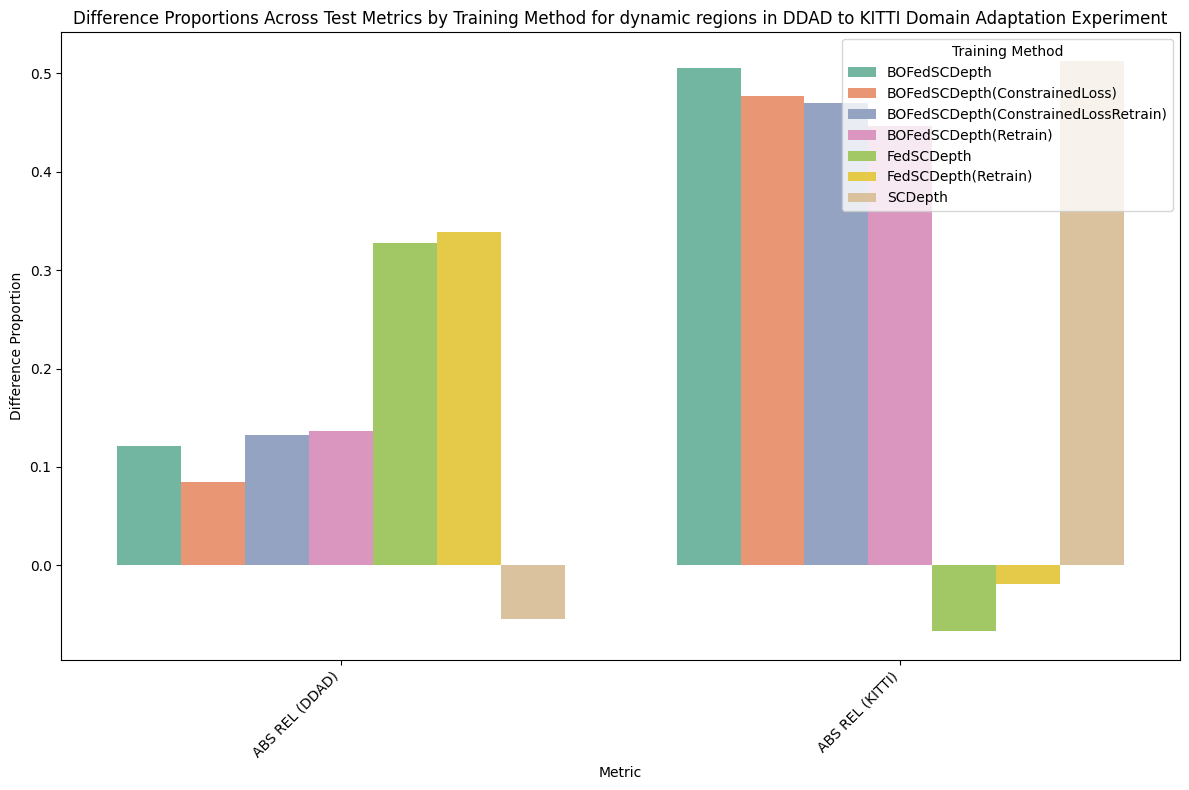

,training_method,ABS REL (DDAD),ABS REL (KITTI)
0,BOFedSCDepth,-0.055814,0.644860
1,BOFedSCDepth(ConstrainedLoss),-0.074419,0.629283
2,BOFedSCDepth(ConstrainedLossRetrain),-0.009302,0.641745
3,BOFedSCDepth(Retrain),-0.009302,0.635514
4,FedSCDepth,0.412088,0.206667
5,FedSCDepth(Retrain),0.406593,0.206667
6,SCDepth,-0.578947,0.651515


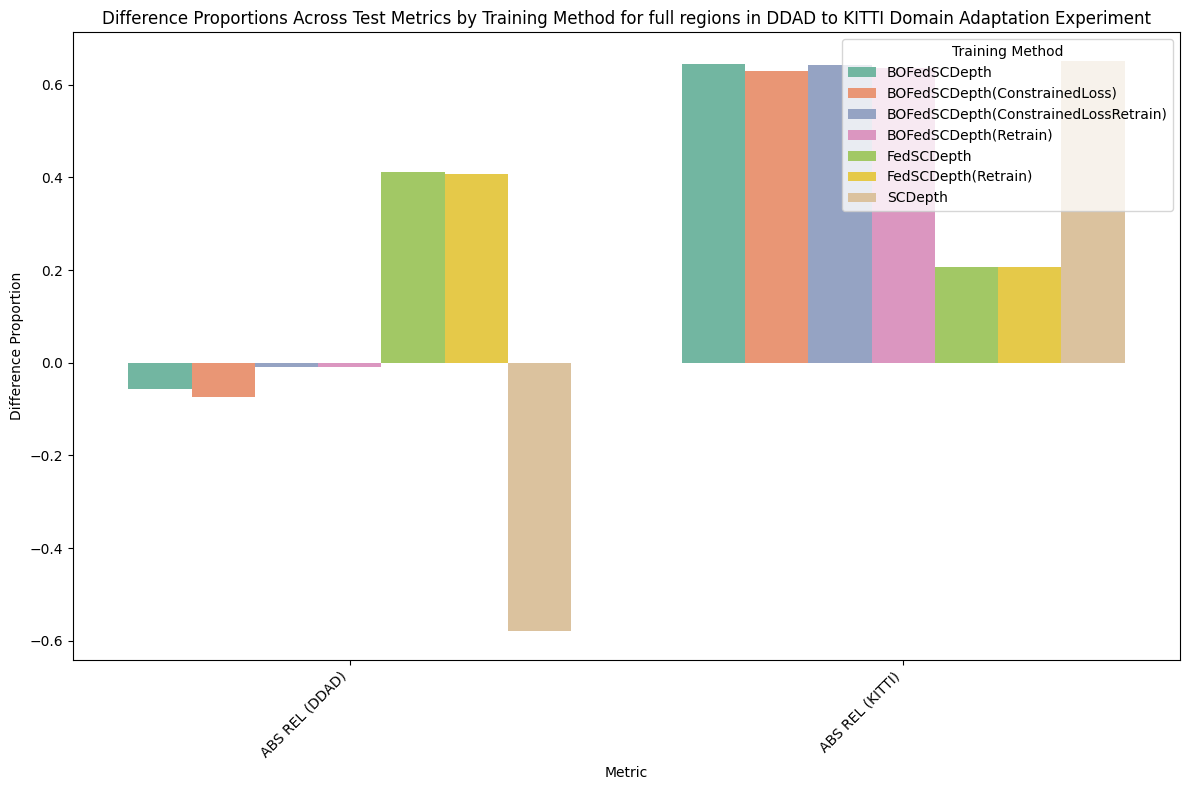

,training_method,ABS REL (DDAD),ABS REL (KITTI)
0,BOFedSCDepth,-0.089202,0.656863
1,BOFedSCDepth(ConstrainedLoss),-0.103286,0.643791
2,BOFedSCDepth(ConstrainedLossRetrain),-0.032864,0.656863
3,BOFedSCDepth(Retrain),-0.032864,0.650327
4,FedSCDepth,0.431937,0.258503
5,FedSCDepth(Retrain),0.424084,0.258503
6,SCDepth,-0.668919,0.671779


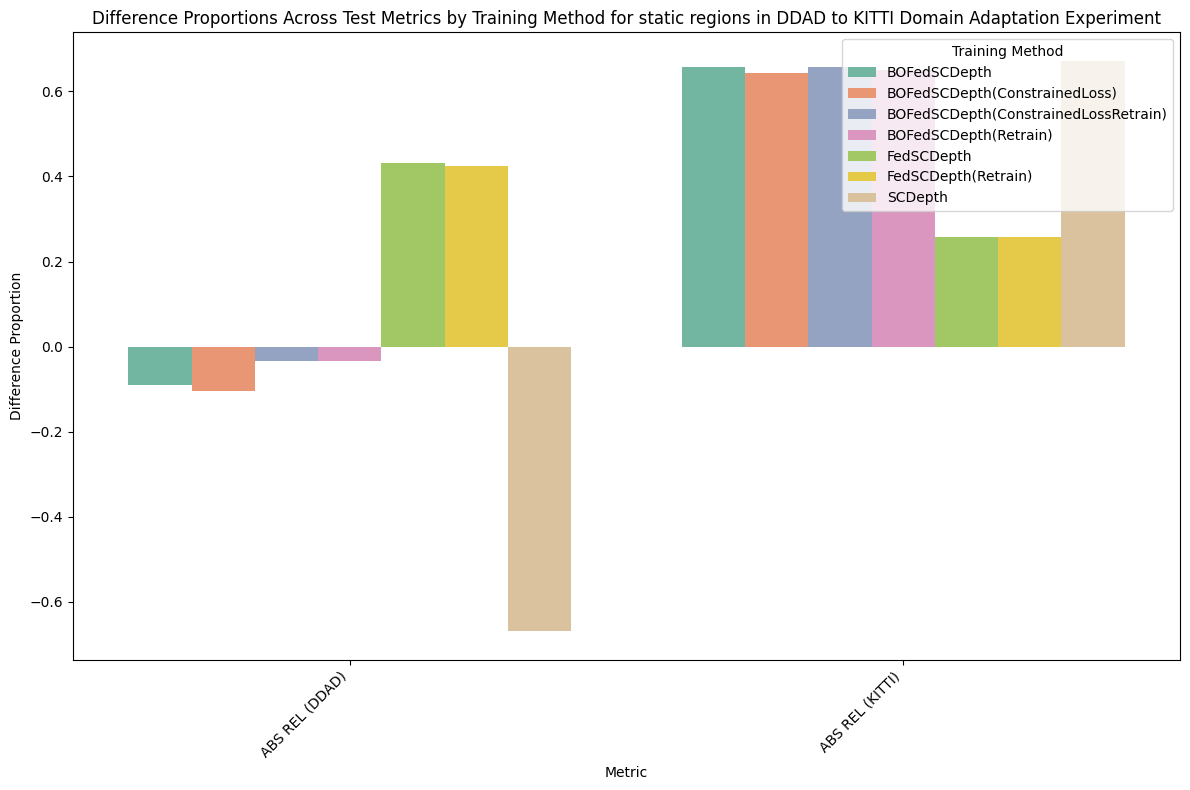

,training_method,ABS REL (DDAD),ABS REL (KITTI)
0,BOFedSCDepth,0.214286,-0.397260
1,BOFedSCDepth(ConstrainedLoss),0.180451,-0.465753
2,BOFedSCDepth(ConstrainedLossRetrain),0.157895,-0.525114
3,BOFedSCDepth(Retrain),0.184211,-0.378995
4,FedSCDepth,0.128906,-0.504673
5,FedSCDepth(Retrain),0.082031,-0.224299
6,SCDepth,0.044053,-0.879581


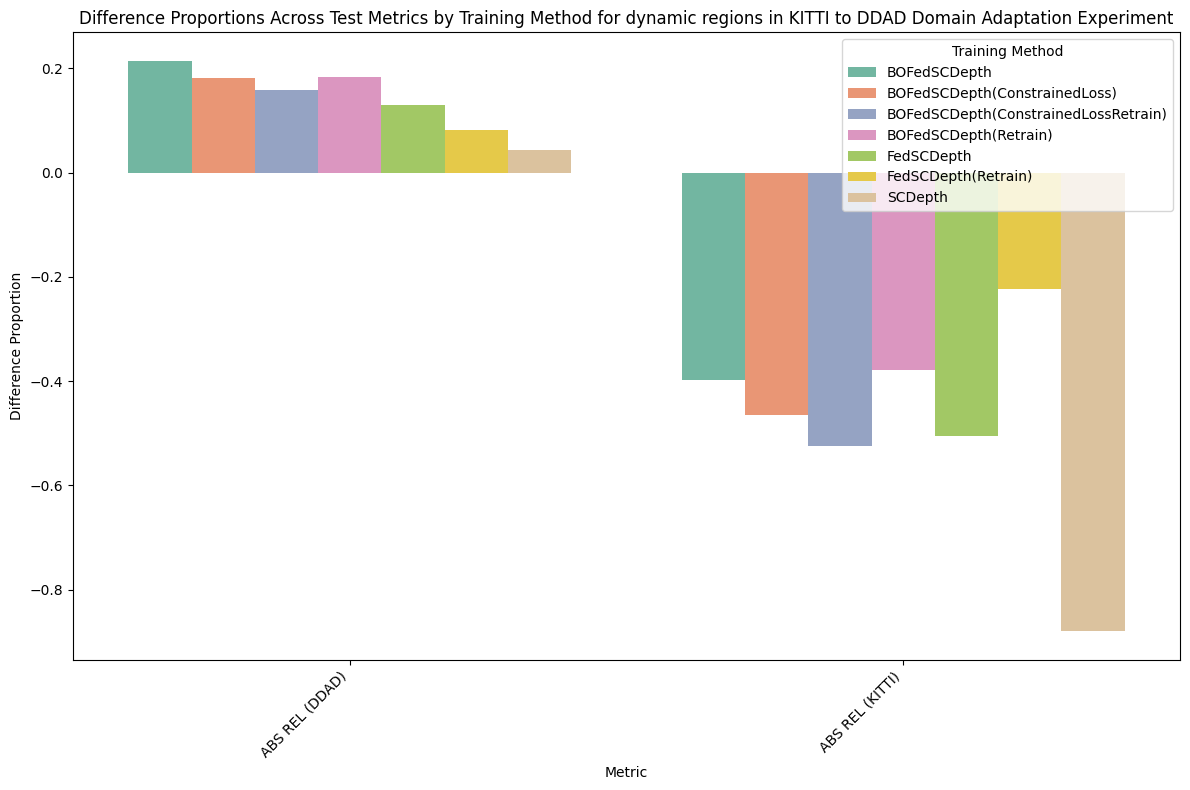

,training_method,ABS REL (DDAD),ABS REL (KITTI)
0,BOFedSCDepth,0.392713,-0.624000
1,BOFedSCDepth(ConstrainedLoss),0.384615,-0.792000
2,BOFedSCDepth(ConstrainedLossRetrain),0.372470,-0.768000
3,BOFedSCDepth(Retrain),0.380567,-0.632000
4,FedSCDepth,0.365854,-0.825000
5,FedSCDepth(Retrain),0.288618,-0.416667
6,SCDepth,0.360360,-1.295652


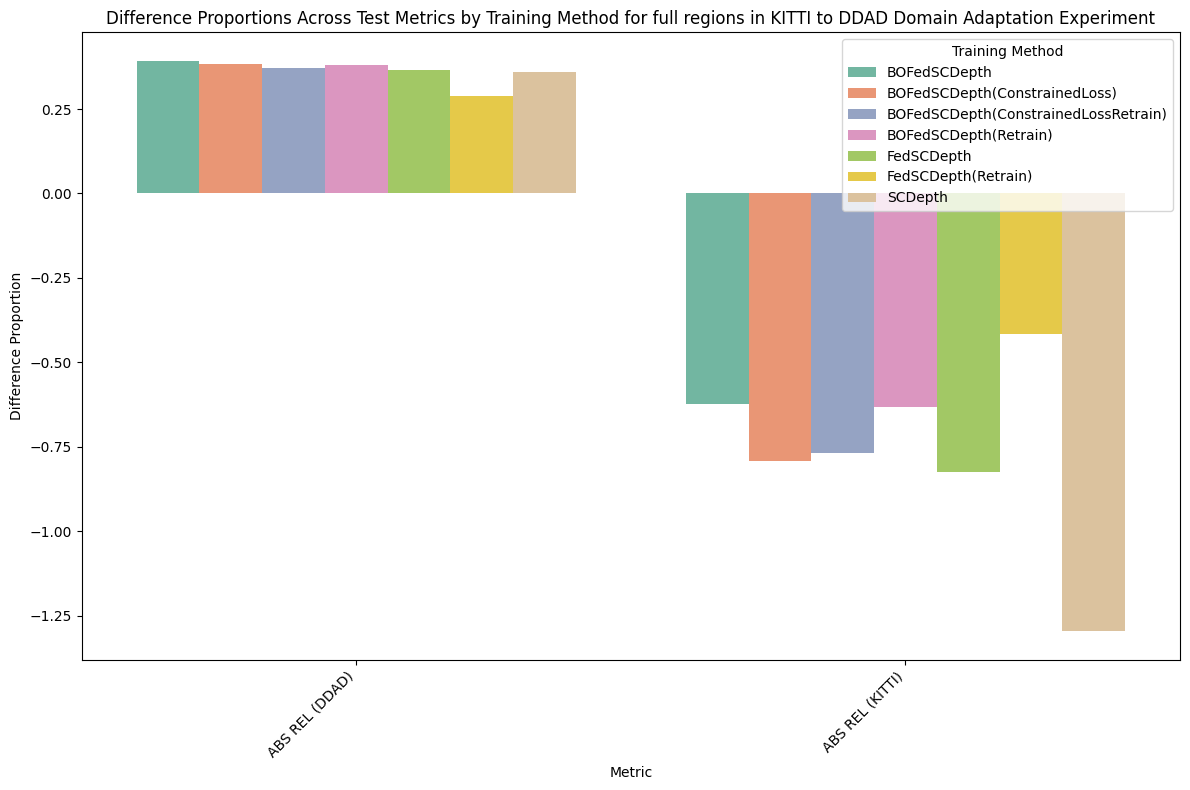

,training_method,ABS REL (DDAD),ABS REL (KITTI)
0,BOFedSCDepth,0.414343,-0.719298
1,BOFedSCDepth(ConstrainedLoss),0.410359,-0.903509
2,BOFedSCDepth(ConstrainedLossRetrain),0.394422,-0.868421
3,BOFedSCDepth(Retrain),0.406375,-0.728070
4,FedSCDepth,0.394422,-0.944954
5,FedSCDepth(Retrain),0.318725,-0.458716
6,SCDepth,0.384956,-1.471698


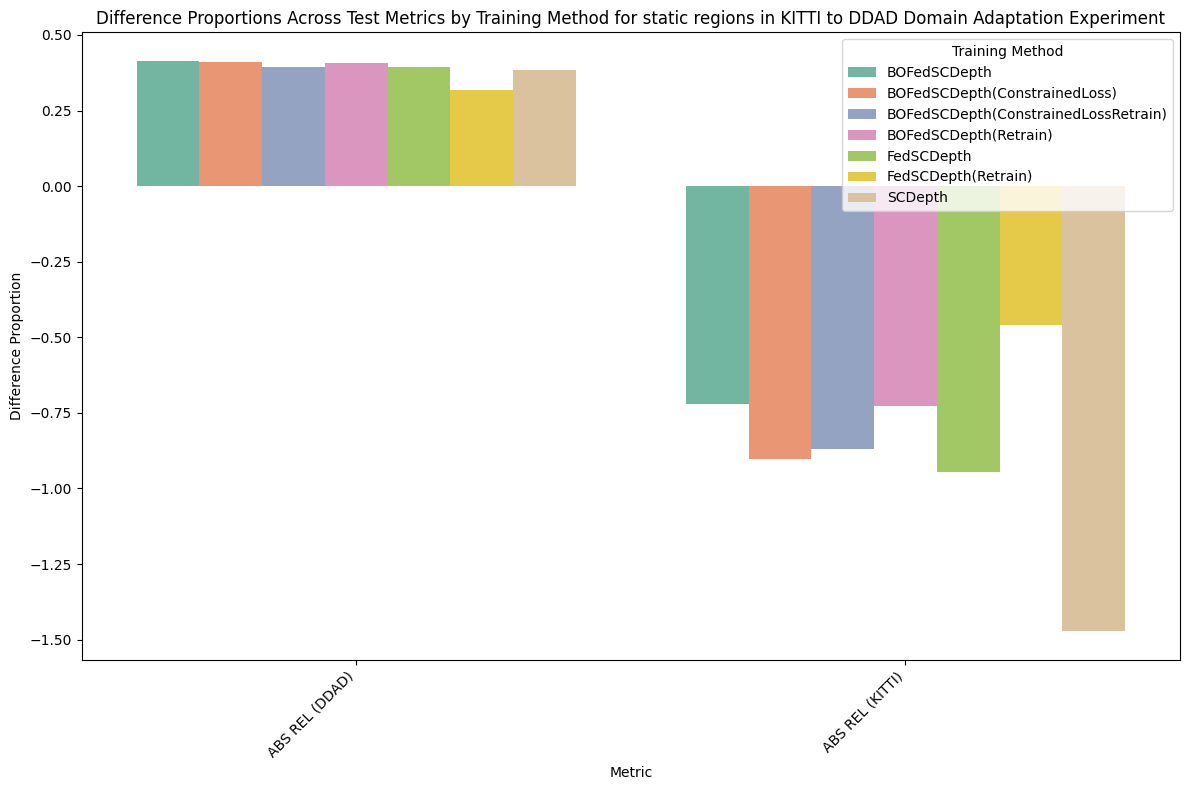

In [4]:
for source_train_dataset in result_change_df['source_train_dataset'].unique():
    for target_train_dataset in result_change_df['target_train_dataset'].unique():
        scenario_df = result_change_df[(result_change_df['source_train_dataset'] == source_train_dataset) & (result_change_df['target_train_dataset'] == target_train_dataset)]
        if len(scenario_df) == 0:
            continue # skip
        scenario_df = scenario_df.drop(columns=['source_train_dataset', 'target_train_dataset'])
        for region_type in scenario_df['test_region_type'].unique():
            kitti_to_ddad_by_region_type_df = scenario_df[scenario_df['test_region_type'] == region_type]
            kitti_to_ddad_by_region_type_df = kitti_to_ddad_by_region_type_df.drop(columns=['test_region_type'])
            label_metric = lambda metric: metric.replace('test_', "").replace("_diff_prop", "").replace("_", " ").upper()
            metric_labels = [ label_metric(metric) for metric in renamed_metrics ]
            renamed_columns = ['training_method', 'test_dataset']
            renamed_columns.extend(metric_labels)
            kitti_to_ddad_by_region_type_df.columns = renamed_columns
            kitti_to_ddad_by_region_type_melted_df = pd.melt(kitti_to_ddad_by_region_type_df, id_vars=['training_method', 'test_dataset'], var_name='metric', value_name='value')
            pivoted_df = kitti_to_ddad_by_region_type_melted_df.pivot(index='training_method', columns=['test_dataset', 'metric'], values='value')
            pivoted_df.columns = [f"{col[1]} ({col[0]})" for col in pivoted_df.columns]
            pivoted_df = pivoted_df.reset_index()
            display(pivoted_df)
            plot_diff_prop(pivoted_df, region_type, source_train_dataset, target_train_dataset)